# Principal Component Analysis (PCA)

PCA is a dimensionality reduction technique that aims to find the most important features (principal components) in your data by identifying directions of maximum variance. Here's a step-by-step explanation:

## 1. Standardize the Data

**Why:** PCA is sensitive to the scale of the features. Standardizing the data (giving it a mean of 0 and a standard deviation of 1) ensures that all features contribute equally.

**How:** For each feature *x*, subtract the mean $\mu_x$ and then divide by its standard deviation $\sigma_x$:

$$
z_i = \frac{x_i - \mu_x}{\sigma_x}
$$

## 2. Calculate the Covariance Matrix

**Why:** The covariance matrix shows how the features in your data are related to each other.

**How:** The covariance between two features *x* and *y* is calculated as:

$$
\text{cov}(x, y) = \frac{\sum_{i=1}^{n} (x_i - \mu_x)(y_i - \mu_y)}{n - 1}
$$

Where:

*   $x_i$ and $y_i$ are the individual values of the features.
*   $\mu_x$ and $\mu_y$ are the means of the features *x* and *y*, respectively.
*   $n$ is the number of data points.

The covariance matrix is a square matrix where the element at position $(i, j)$ is the covariance between the $i$-th and $j$-th features. The diagonal elements represent the variances of each feature.

## 3. Calculate Eigenvalues and Eigenvectors

**Why:** Eigenvectors represent the directions of maximum variance, and eigenvalues represent the magnitude of the variance along those directions.

**How:** This involves solving the equation:

$$
\text{CovarianceMatrix} \cdot \text{Eigenvector} = \text{Eigenvalue} \cdot \text{Eigenvector}
$$

Or, more concisely:

$$
\Sigma v = \lambda v
$$

Where:

*   $\Sigma$ is the covariance matrix.
*   $v$ is an eigenvector.
*   $\lambda$ is an eigenvalue.

Eigenvalues and eigenvectors are typically computed using linear algebra libraries (like NumPy in Python).

## 4. Select Principal Components

**Why:** We choose the eigenvectors that correspond to the largest eigenvalues, as these capture the most variance.

**How:** Sort the eigenvalues in descending order. The eigenvectors corresponding to the top *k* eigenvalues (where *k* is the desired number of dimensions) are the principal components.

## 5. Create the Projection Matrix (Feature Vector)

**Why:** The projection matrix transforms the original data into the new lower-dimensional space.

**How:** Create a matrix *W* where the columns are the selected eigenvectors (principal components).

## 6. Transform the Data

**Why:** This projects the original data onto the principal components.

**How:** Multiply the original data matrix *X* by the projection matrix *W*:

$$
\text{NewData} = XW
$$

## 7. Explained Variance Ratio

**Why:** This tells us how much of the total variance is explained by each principal component.

**How:** The explained variance ratio for the *i*-th principal component is:

$$
\frac{\lambda_i}{\sum_{j=1}^{n} \lambda_j}
$$

Where:

*   $\lambda_i$ is the *i*-th eigenvalue.

In summary, PCA finds the directions of maximum variance (principal components) and projects the data onto a lower-dimensional subspace spanned by these components. This reduces the number of features while retaining as much of the important information (variance) as possible.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

In [15]:
# 1. Generate Sample 3D Data
np.random.seed(42)
mean = [0, 0, 0]
cov = [[1, 0.5, 0.2], [0.5, 1.5, 0.1], [0.2, 0.1, 0.8]]  # Example covariance
X = np.random.multivariate_normal(mean, cov, 100)

In [16]:
# 2. Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# 3. Apply PCA (Keeping all 3 components initially)
pca = PCA(n_components=3)
pca.fit(X_scaled)

PCA(n_components=3)

In [19]:
# 4. Eigenvalues and Eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues: [1.2084577  1.03865112 0.78319421]
Eigenvectors:
 [[ 0.71698171  0.6918281   0.08550499]
 [ 0.18019418 -0.30242676  0.9359851 ]
 [ 0.67339979 -0.6556767  -0.34149785]]


In [20]:
# 5. Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)
print("Total Explained Variance:", sum(explained_variance_ratio))

Explained Variance Ratio: [0.39879104 0.34275487 0.25845409]
Total Explained Variance: 1.0


Text(0.5, 0.92, 'Original Scaled Data (3D)')

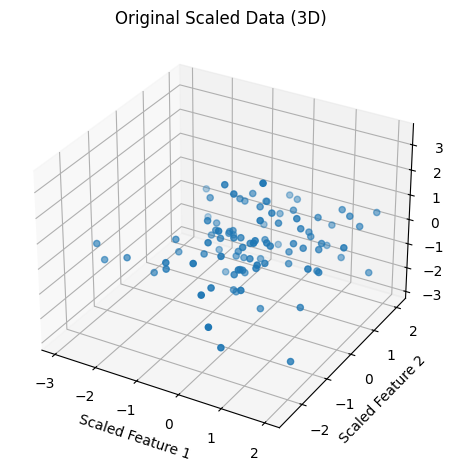

In [21]:
# 6. 3D Plot of Original and Transformed Data

fig = plt.figure(figsize=(12, 6))

# Original Data (3D)
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2])
ax1.set_xlabel("Scaled Feature 1")
ax1.set_ylabel("Scaled Feature 2")
ax1.set_zlabel("Scaled Feature 3")
ax1.set_title("Original Scaled Data (3D)")

In [23]:
# Transform the Data
X_pca = pca.transform(X_scaled)

# Transformed Data (3D)
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2])
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")
ax2.set_zlabel("Principal Component 3")
ax2.set_title("Transformed Data (PCA - 3D)")

plt.show()


Reducing to 2 Dimensions:
Explained Variance Ratio (2D): [0.39879104 0.34275487]
Total Explained Variance (2D): 0.7415459116080152


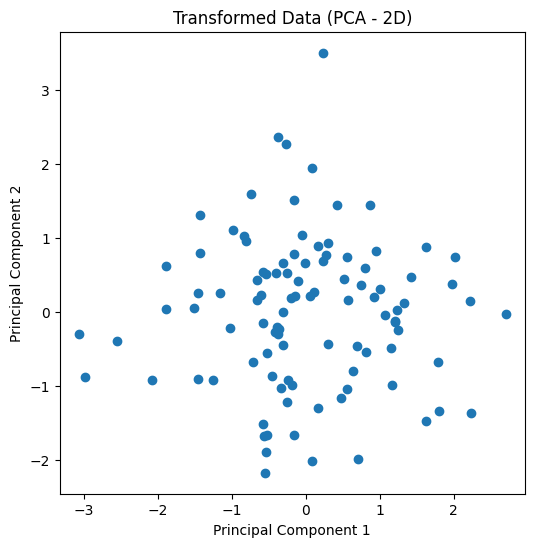

In [24]:
# 7. Reducing to 2 Dimensions and Plotting

pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

print("\nReducing to 2 Dimensions:")
print("Explained Variance Ratio (2D):", pca_2d.explained_variance_ratio_)
print("Total Explained Variance (2D):", sum(pca_2d.explained_variance_ratio_))

plt.figure(figsize=(6, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Transformed Data (PCA - 2D)")
plt.axis('equal')
plt.show()

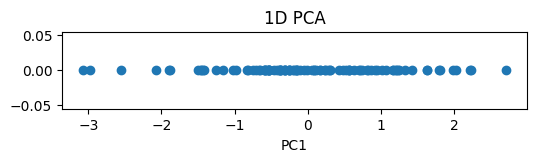

Explained Variance Ratio (1D): [0.39879104]


In [25]:
#Reducing to 1 dimension
pca_1d = PCA(n_components=1)
X_pca_1d = pca_1d.fit_transform(X_scaled)

plt.figure(figsize=(6,1))
plt.scatter(X_pca_1d,np.zeros_like(X_pca_1d))
plt.title("1D PCA")
plt.xlabel("PC1")
plt.show()

print("Explained Variance Ratio (1D):", pca_1d.explained_variance_ratio_)